Установка библиотек

In [1]:
%pip install --upgrade pandas
%pip install --upgrade pandas-datareader
%pip install --upgrade yfinance
%pip install --upgrade xlrd
%pip install --upgrade xlsxwriter
%pip install --upgrade openpyxl
%pip install --upgrade seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 12.2 MB 4.9 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 109 kB 5.8 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 2.4 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 112 kB 37.1 MB/s 
     |████████████████████████████████| 128 kB 44.5 MB/s 
     |██████

Подключение к google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


Imports

In [10]:
import pandas_datareader.data as web
from pandas_datareader import data as pdr
import yfinance as yf
from datetime import datetime
from dateutil.relativedelta import relativedelta
import pandas
import numpy
import seaborn
import matplotlib.pyplot as plot

Получение данных с ценами акций компаний из COMPANIES.
Запись в companies.csv.

In [4]:
#DATEFROM = '1970-02-01'
#DATETO = '2022-11-01'
startdate = datetime(1970, 2, 1)
enddate = datetime(2022, 11, 1)
COMPANIES = {'AAPL': 'Apple', 'TWTR': 'Twitter', 'AMZN': 'Amazon', 'HPQ': 'Hp', 'GOOD': 'Google',
             'MSFT': 'Microsoft', 'BB': 'Blackberry', 'EBAY': 'Ebay', 'IBM': 'Ibm',
             'ADBE': 'Adobe', 'META': 'Facebook', 'DIS': 'Disney'}

yf.pdr_override()
df = pdr.get_data_yahoo(list(COMPANIES.keys()), start=startdate, end=enddate)
df_SP = pdr.get_data_yahoo('%5ESP500-45', start=startdate, end=enddate)

#df = web.DataReader(COMPANIES.keys(), 'yahoo', start=DATEFROM, end=DATETO)
#df_SP = web.DataReader('%5ESP500-45', 'yahoo', start=DATEFROM, end=DATETO)

cols = [col for col in df.columns if col[0] == 'Close']
df = df.loc[:, cols]
df.columns = [COMPANIES[col[1]] for col in cols]

df.to_csv('/content/drive/MyDrive/Colab Notebooks/DATA/companies.csv')
df_SP.to_csv('/content/drive/MyDrive/Colab Notebooks/DATA/S&P500.csv')
print(df)
print(df_SP)


[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  1 of 1 completed
                 Apple       Adobe      Amazon  Blackberry      Disney  \
Date                                                                     
1970-02-02         NaN         NaN         NaN         NaN    0.736021   
1970-02-03         NaN         NaN         NaN         NaN    0.736021   
1970-02-04         NaN         NaN         NaN         NaN    0.746298   
1970-02-05         NaN         NaN         NaN         NaN    0.738590   
1970-02-06         NaN         NaN         NaN         NaN    0.759143   
...                ...         ...         ...         ...         ...   
2022-10-25  152.339996  323.790009  120.599998        4.57  104.360001   
2022-10-26  149.350006  320.480011  115.660004        4.53  104.629997   
2022-10-27  144.800003  318.649994  110.959999        4.53  104.440002   
2022-10-28  155.740005  325.679993  103.410004

Расчет значений средней цены акций за год до покупки компании и через год. Запись результатов в Excel.

In [5]:
MONTH_STR = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
dates_dict = {'Apple': [], 'Twitter': [], 'Amazon': [], 'Hp': [], 'Google': [], 'Microsoft': [],
              'Blackberry': [], 'Ebay': [], 'Ibm': [], 'Adobe': [], 'Facebook': [], 'Disney': []}
new_df = {'Avg stocks prev. year': [], 'Avg stocks next year': [],
          'Avg S&P prev. year': [], 'Avg S&P next year': []}

SP_df = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/S&P500.csv', index_col=0, na_values='-')[['Close']]
SP_df.index = pandas.DatetimeIndex(SP_df.index)
print(SP_df)

companies_df = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/DATA/companies.csv', index_col=0, na_values='-')
companies_df.index = pandas.DatetimeIndex(companies_df.index)
print(companies_df)

excel_df = pandas.read_excel('/content/drive/MyDrive/Colab Notebooks/DATA/acquisitions_Svetlov.xls', sheet_name='Worksheet', na_values='-')
print(excel_df)
dates_list = excel_df.loc[:, ['Parent Company', 'Acquisition Year', 'Acquisition Month']].values.tolist()
print(dates_list)

for company, i_year, i_month in dates_list:
    year = str(i_year).split('.')[0]
    if i_month in MONTH_STR and year == year:
        month = str(MONTH_STR.index(i_month) + 1).zfill(2)
        dates_dict[company].append(year + '-' + month)
    else:
        dates_dict[company].append(numpy.NaN)
print(dates_dict)

for company in dates_dict:
    for date in dates_dict[company]:
        l_stocks_avg, r_stocks_avg, l_SP_avg, r_SP_avg = numpy.NaN, numpy.NaN, numpy.NaN, numpy.NaN
        if date == date:
            c_date = datetime.strptime(date, '%Y-%m').date()

            l_period_start = c_date - relativedelta(years=1) - pandas.offsets.MonthBegin(0)
            l_period_end = c_date - relativedelta(months=1) + pandas.offsets.MonthEnd(0)
            r_period_start = c_date + relativedelta(months=1) - pandas.offsets.MonthBegin(0)
            r_period_end = c_date + relativedelta(years=1) + pandas.offsets.MonthEnd(0)

            l_stocks_list = companies_df.loc[l_period_start:l_period_end, company]
            r_stocks_list = companies_df.loc[r_period_start:r_period_end, company]

            l_SP_list = SP_df.loc[l_period_start:l_period_end, 'Close']
            r_SP_list = SP_df.loc[r_period_start:r_period_end, 'Close']

            if len(l_stocks_list) > 180 and len(r_stocks_list) > 180:  # 180 - min values count in year
                l_stocks_avg = sum(l_stocks_list) / len(l_stocks_list)
                r_stocks_avg = sum(r_stocks_list) / len(r_stocks_list)
            if len(l_SP_list) > 200 and len(r_SP_list) > 200:  # 200 - min values count in year
                l_SP_avg = sum(l_SP_list) / len(l_SP_list)
                r_SP_avg = sum(r_SP_list) / len(r_SP_list)

        new_df['Avg stocks prev. year'].append(l_stocks_avg), new_df['Avg stocks next year'].append(r_stocks_avg)
        new_df['Avg S&P prev. year'].append(l_SP_avg), new_df['Avg S&P next year'].append(r_SP_avg)


new_df = pandas.DataFrame(new_df)
new_df['Avg stocks change %'] = [(y/x-1) if (x == x and y == y) else numpy.NaN
                                 for x, y in zip(new_df['Avg stocks prev. year'], new_df['Avg stocks next year'])]
new_df['Avg S&P change %'] = [(y/x-1) if (x == x and y == y) else numpy.NaN
                              for x, y in zip(new_df['Avg S&P prev. year'], new_df['Avg S&P next year'])]
new_df['Benchmark index'] = [(x-y) if (x == x and y == y) else numpy.NaN
                             for x, y in zip(new_df['Avg stocks change %'], new_df['Avg S&P change %'])]
print(new_df)

result_df = pandas.concat([excel_df, new_df], axis=1)
writer = pandas.ExcelWriter('/content/drive/MyDrive/Colab Notebooks/DATA/acquisitions_Svetlov_new.xlsx', engine='xlsxwriter')
result_df.to_excel(writer, sheet_name='Worksheet', index=False)
writer.close()


                  Close
Date                   
1993-05-04    76.230003
1993-05-05    76.889999
1993-05-06    76.419998
1993-05-07    77.089996
1993-05-10    77.029999
...                 ...
2022-10-25  2251.110107
2022-10-26  2200.830078
2022-10-27  2173.330078
2022-10-28  2271.629883
2022-10-31  2241.129883

[7425 rows x 1 columns]
                 Apple       Adobe      Amazon  Blackberry      Disney  \
Date                                                                     
1970-02-02         NaN         NaN         NaN         NaN    0.736021   
1970-02-03         NaN         NaN         NaN         NaN    0.736021   
1970-02-04         NaN         NaN         NaN         NaN    0.746298   
1970-02-05         NaN         NaN         NaN         NaN    0.738590   
1970-02-06         NaN         NaN         NaN         NaN    0.759143   
...                ...         ...         ...         ...         ...   
2022-10-25  152.339996  323.790009  120.599998        4.57  104.360001 

Графики. Часть 1

        ID Parent Company  Acquisition Year Acquisition Month  \
0        1          Apple            1988.0               Mar   
1        2          Apple            1988.0               Jun   
2        3          Apple            1988.0               Jun   
3        4          Apple            1988.0               Jul   
4        5          Apple            1989.0               Jan   
...    ...            ...               ...               ...   
1363  1364         Disney            2009.0               Dec   
1364  1365         Disney            2012.0               Dec   
1365  1366         Disney            2014.0               NaN   
1366  1367         Disney            2017.0               NaN   
1367  1368         Disney            2019.0               Mar   

           Acquired Company           Business Country Acquisition Price  \
0       Network Innovations           Software     NaN               NaN   
1     Orion Network Systems  Computer Software     NaN             

<ipython-input-7-a6bda06fa7cb>:47: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax1.set_xticks(xa, xa_short)
<ipython-input-7-a6bda06fa7cb>:61: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(xa2, xa2_short)
<ipython-input-7-a6bda06fa7cb>:84: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(xa2, xa2_short)


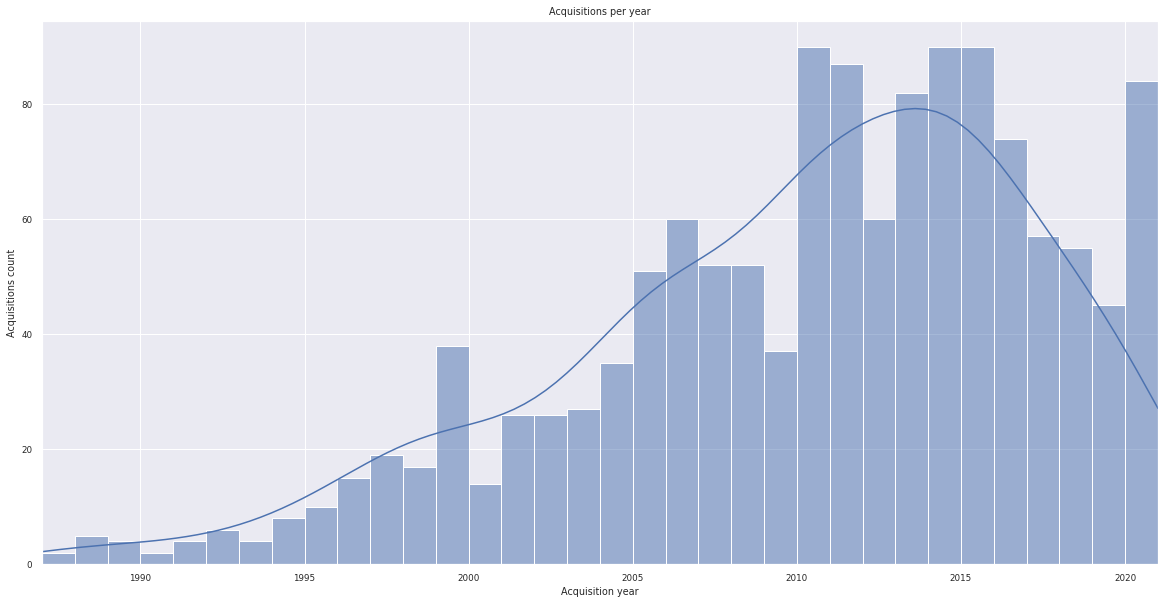

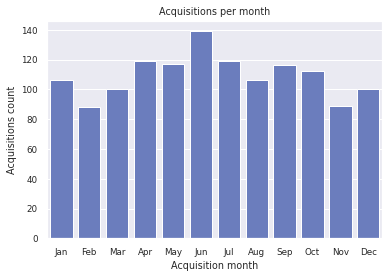

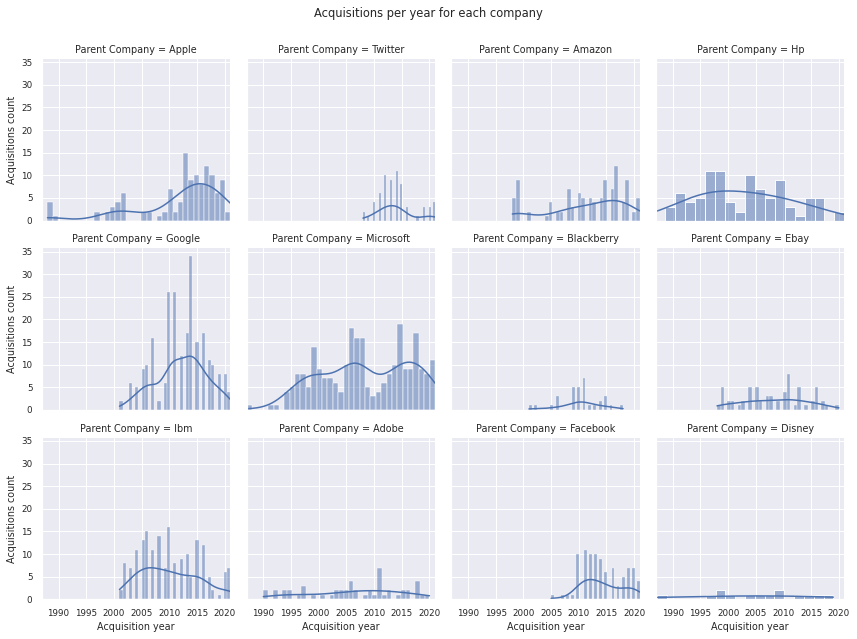

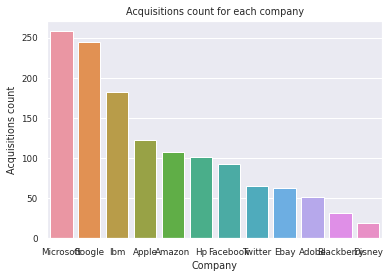

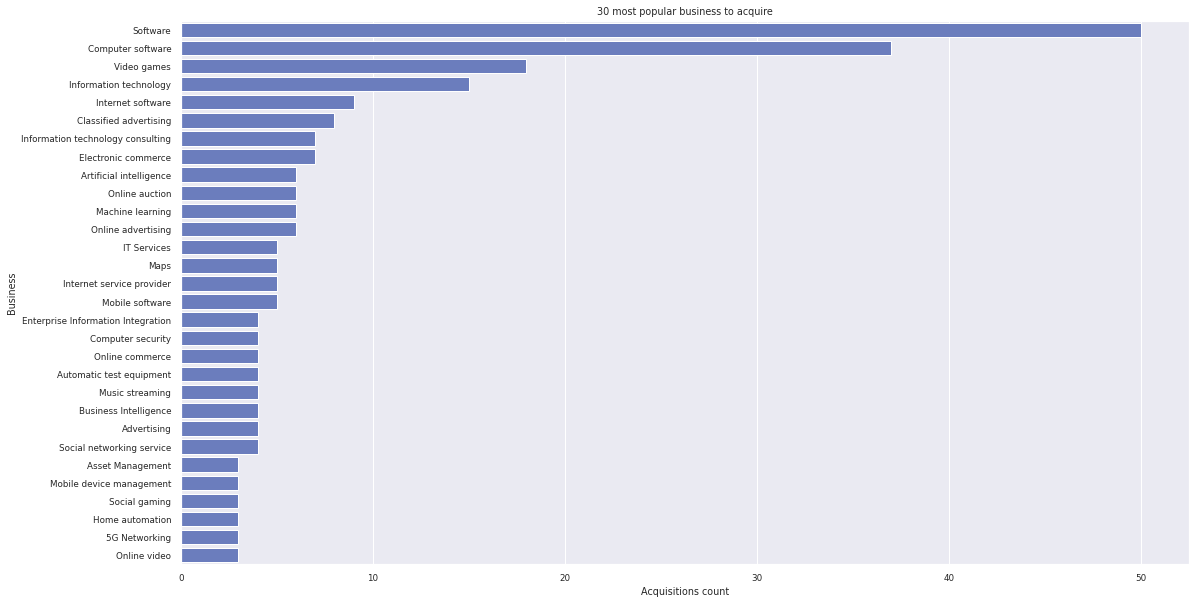

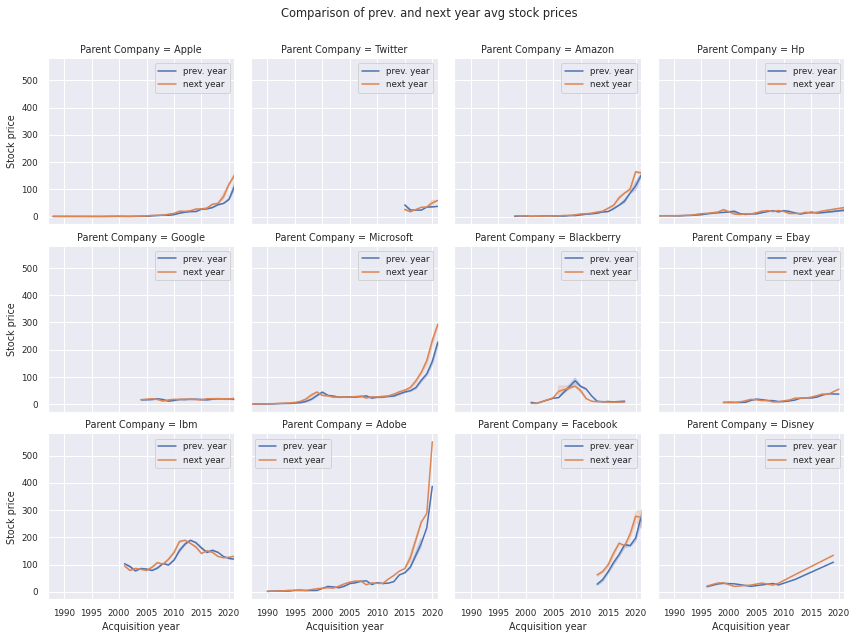

In [7]:
excel_df = pandas.read_excel('/content/drive/MyDrive/Colab Notebooks/DATA/acquisitions_Svetlov_new.xlsx', sheet_name='Worksheet', na_values='')
print(excel_df)
df_year_f, df_month_f, df_change_type1 = excel_df.copy(), excel_df.copy(), excel_df.copy()
df_bsn, df_comp = excel_df.copy(), excel_df.copy()

df_year_f.dropna(subset=['Acquisition Year'], inplace=True)

months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_month_f.dropna(subset=['Acquisition Month'], inplace=True)
df_month_f = df_month_f.groupby(['Acquisition Month']).count().ID.reset_index()
df_month_f['Acquisition Month'] = pandas.Categorical(df_month_f['Acquisition Month'], categories=months, ordered=True)

df_change_type1.dropna(subset=['Avg stocks prev. year', 'Avg stocks next year'], inplace=True)
df_change_type2 = df_change_type1.copy()
df_change_type1['type'], df_change_type2['type'] = 'prev. year', 'next year'
df_change_type1.rename(columns={'Avg stocks prev. year': 'avg stocks'}, inplace=True)
df_change_type2.rename(columns={'Avg stocks next year': 'avg stocks'}, inplace=True)
df_change_f = pandas.concat([df_change_type1, df_change_type2])

df_bsn.dropna(subset=['Business'], inplace=True)
df_bsn = df_bsn.groupby(['Business']).count().ID.reset_index()
df_bsn = df_bsn.sort_values(by=['ID'], ascending=False).head(30)

df_comp.dropna(subset=['Acquisition Year'], inplace=True)
df_comp = df_comp.groupby(['Parent Company']).count().ID.reset_index()
df_comp = df_comp.sort_values(by=['ID'], ascending=False)

print(df_year_f)
print(df_month_f)
print(df_change_f)
print(df_bsn)
print(df_comp)

xlim_l, xlim_r = 1987, 2021
xa = range(xlim_l, xlim_r+1)
xa_short = [str(date)[2:] for date in xa]
xa2 = range(xlim_l, xlim_r+1, 2)
xa2_short = [str(date)[2:] for date in xa2]

seaborn.set(font_scale=0.8)

# Acquisitions per year
fig1, ax1 = plot.subplots(figsize=(20, 10))
seaborn.histplot(data=df_year_f, ax=ax1, x="Acquisition Year", binwidth=1, bins=len(xa), kde=True).\
    set(title='Acquisitions per year', xlabel="Acquisition year", ylabel='Acquisitions count')
ax1.set_xlim(xlim_l, xlim_r)
ax1.set_xticks(xa, xa_short)
fig1.savefig("/content/drive/MyDrive/Colab Notebooks/IMG/Acquisitions per year.png")

# Acquisitions per month
fig2, ax2 = plot.subplots()
seaborn.barplot(data=df_month_f, x="Acquisition Month", y="ID", color='#5D76CB').\
    set(title='Acquisitions per month', xlabel="Acquisition month", ylabel='Acquisitions count')
fig2.savefig("/content/drive/MyDrive/Colab Notebooks/IMG/Acquisitions per month.png")

# Acquisitions per year for each company
gr1 = seaborn.FacetGrid(df_year_f, col="Parent Company", col_wrap=4, xlim=(xlim_l, xlim_r))
gr1.map(seaborn.histplot, "Acquisition Year", bins=len(xa), kde=True)
gr1.set_axis_labels("Acquisition year", "Acquisitions count")
for ax in gr1.axes_dict.values():
    ax.set_xticks(xa2, xa2_short)
gr1.fig.subplots_adjust(top=0.9)
gr1.fig.suptitle('Acquisitions per year for each company')
gr1.savefig("/content/drive/MyDrive/Colab Notebooks/IMG/Acquisitions per year for each company.png", dpi=400)

# Acquisitions count for each company
fig3, ax3 = plot.subplots()
seaborn.barplot(data=df_comp, x="Parent Company", y='ID').\
    set(title='Acquisitions count for each company', xlabel="Company", ylabel='Acquisitions count')
fig3.savefig("/content/drive/MyDrive/Colab Notebooks/IMG/Acquisitions count for each company.png")

# 30 most popular business to acquire
fig4, ax4 = plot.subplots(figsize=(20, 10))
seaborn.barplot(data=df_bsn, x="ID", y="Business", color='#5D76CB').\
    set(title='30 most popular business to acquire', xlabel="Acquisitions count", ylabel='Business')
fig4.savefig("/content/drive/MyDrive/Colab Notebooks/IMG/30 most popular business to acquire.png")
fig4.subplots_adjust(left=0.2)

# Comparison of prev. and next year avg stock prices
gr2 = seaborn.FacetGrid(df_change_f, col="Parent Company", hue='type', col_wrap=4, xlim=(xlim_l, xlim_r))
gr2.map(seaborn.lineplot, "Acquisition Year", "avg stocks")
gr2.set_axis_labels("Acquisition year", "Stock price")
for ax in gr2.axes_dict.values():
    ax.set_xticks(xa2, xa2_short)
    ax.legend()
gr2.fig.subplots_adjust(top=0.9)
gr2.fig.suptitle('Comparison of prev. and next year avg stock prices')
gr2.savefig("/content/drive/MyDrive/Colab Notebooks/IMG/Comparison of prev. and next year avg stock prices.png", dpi=400)

plot.show()

Графики. Часть 2

        ID Par_comp  Acquisition Year Acquisition Month  \
0        1    Apple            1988.0               Mar   
1        2    Apple            1988.0               Jun   
2        3    Apple            1988.0               Jun   
3        4    Apple            1988.0               Jul   
4        5    Apple            1989.0               Jan   
...    ...      ...               ...               ...   
1363  1364   Disney            2009.0               Dec   
1364  1365   Disney            2012.0               Dec   
1365  1366   Disney            2014.0               NaN   
1366  1367   Disney            2017.0               NaN   
1367  1368   Disney            2019.0               Mar   

           Acquired Company           Business Country Acquisition Price  \
0       Network Innovations           Software     NaN               NaN   
1     Orion Network Systems  Computer Software     NaN               NaN   
2                 Styleware  Computer software     NaN         

<ipython-input-13-336840aa4741>:41: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(xa2, xa2_short)
<ipython-input-13-336840aa4741>:41: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(xa2, xa2_short)
<ipython-input-13-336840aa4741>:41: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(xa2, xa2_short)
<ipython-input-13-336840aa4741>:41: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set

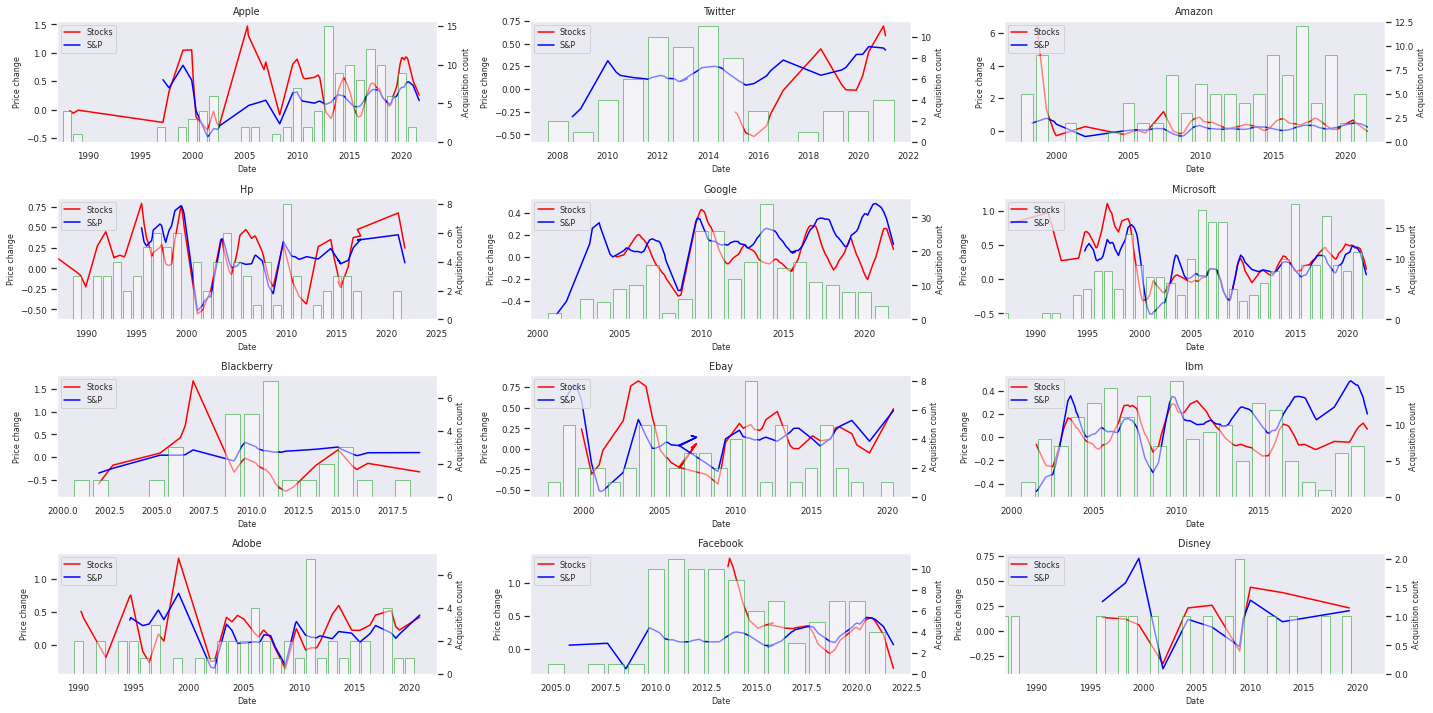

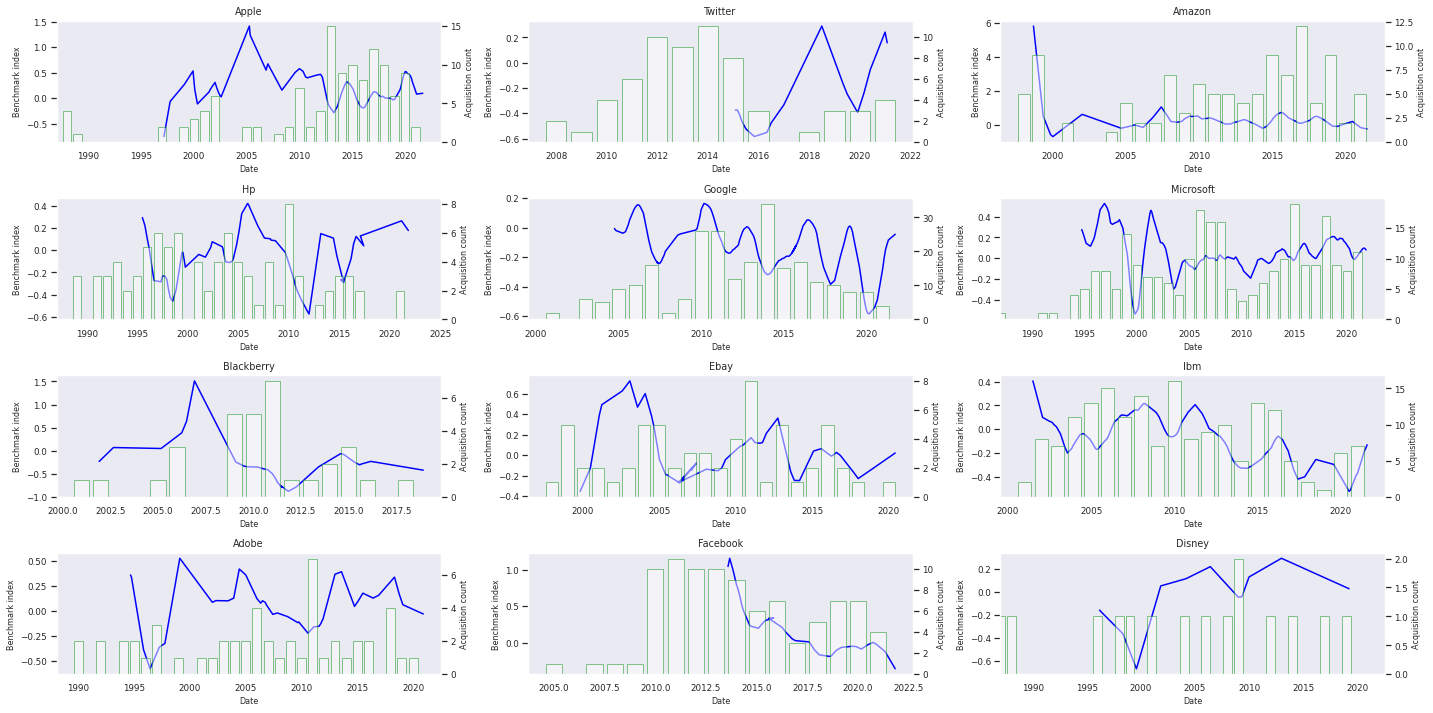

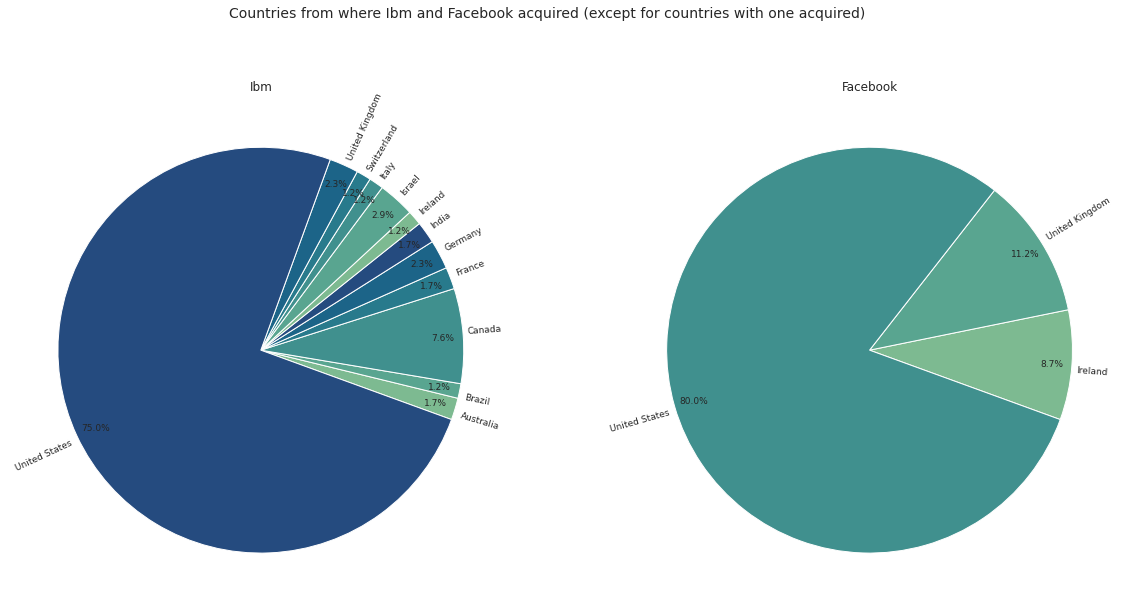

In [13]:
MONTH_STR = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
excel_df = pandas.read_excel('/content/drive/MyDrive/Colab Notebooks/DATA/acquisitions_Svetlov_new.xlsx', sheet_name='Worksheet', na_values='')
excel_df.rename(columns={'Parent Company': 'Par_comp'}, inplace=True)
companies = list(excel_df.Par_comp.unique())
print(excel_df)
print(companies)
df_cps, df_acs, df_countries = excel_df.copy(), excel_df.copy(), excel_df.copy()

df_cps.dropna(subset=['Acquisition Year', 'Acquisition Month'], inplace=True)
df_cps['Acquisition Year'] = df_cps['Acquisition Year'].astype(float)
df_cps['Acquisition Month'] = [MONTH_STR.index(x)+1 for x in df_cps['Acquisition Month']]
df_cps['Acquisition Year'] = df_cps['Acquisition Year'] + df_cps['Acquisition Month']/12

df_acs.dropna(subset=['Acquisition Year'], inplace=True)
df_acs = df_acs.groupby(['Par_comp', 'Acquisition Year']).count().ID.reset_index()
df_acs['Acquisition Year'] = df_acs['Acquisition Year'].astype(float)

df_countries = df_countries[numpy.isin(df_countries, ['Ibm', 'Facebook']).any(axis=1)]
df_countries.dropna(subset=['Country'], inplace=True)
df_countries = df_countries.groupby(['Par_comp', 'Country']).count().ID.reset_index()
df_countries = df_countries[df_countries.ID != 1]
companies_p = ['Ibm', 'Facebook']
print(df_cps)
print(df_acs)
print(df_countries)

xlim_l, xlim_r = 1987, 2021
xa = range(xlim_l, xlim_r+1)
xa_short = [str(date)[2:] for date in xa]
xa2 = range(xlim_l, xlim_r+1, 2)
xa2_short = [str(date)[2:] for date in xa2]

seaborn.set(font_scale=0.8)

fig1 = plot.figure(figsize=(20, 10))
for i, company in enumerate(companies):
    df_cps_i = df_cps[(df_cps == str(company)).any(axis=1)]
    df_acs_i = df_acs[(df_acs == str(company)).any(axis=1)]

    ax = plot.subplot(4, 3, i+1)
    ax.set_xticks(xa2, xa2_short)
    ax2 = ax.twinx()
    line1, = ax.plot(df_cps_i['Acquisition Year'], df_cps_i['Avg stocks change %'], color='red', label='Stocks')
    line2, = ax.plot(df_cps_i['Acquisition Year'], df_cps_i['Avg S&P change %'], color='blue', label='S&P')
    pl_b = ax2.bar(df_acs_i['Acquisition Year'], df_acs_i['ID'], alpha=0.5, color='#fff0', edgecolor='#10941d')

    ax.set_title(company)
    ax.legend(handles=[line1, line2], prop={'size': 8}, loc=2)
    ax.set_ylabel('Price change', fontsize=8)
    ax.set_xlabel('Date', fontsize=8)
    ax2.set_ylabel('Acquisition count', fontsize=8)
    ax.grid(False)
    ax2.grid(False)
    if ax.get_xlim()[0] < 1987:
        ax.set_xlim(1987, ax.get_xlim()[1])
fig1.tight_layout()
fig1.savefig("/content/drive/MyDrive/Colab Notebooks/IMG/result_v1")

fig2 = plot.figure(figsize=(20, 10))
for i, company in enumerate(companies):
    df_cps_i = df_cps[(df_cps == str(company)).any(axis=1)]
    df_acs_i = df_acs[(df_acs == str(company)).any(axis=1)]

    ax = plot.subplot(4, 3, i+1)
    ax.set_xticks(xa2, xa2_short)
    ax2 = ax.twinx()
    line1, = ax.plot(df_cps_i['Acquisition Year'], df_cps_i['Benchmark index'], color='blue')
    pl_b = ax2.bar(df_acs_i['Acquisition Year'], df_acs_i['ID'], alpha=0.5, color='#fff0', edgecolor='#10941d')

    ax.set_title(company)
    ax.set_ylabel('Benchmark index', fontsize=8)
    ax.set_xlabel('Date', fontsize=8)
    ax2.set_ylabel('Acquisition count', fontsize=8)
    ax.grid(False)
    ax2.grid(False)
    if ax.get_xlim()[0] < 1987:
        ax.set_xlim(1987, ax.get_xlim()[1])
fig2.tight_layout()
fig2.savefig("/content/drive/MyDrive/Colab Notebooks/IMG/result_v2", dpi=400)


fig3 = plot.figure(figsize=(20, 10))
fig3.suptitle('Countries from where Ibm and Facebook acquired (except for countries with one acquired)',
              fontsize=14)
for i, company in enumerate(companies_p):
    df_countries_i = df_countries[(df_countries == str(company)).any(axis=1)]

    ax = plot.subplot(1, 2, i+1)
    pie = ax.pie(df_countries_i['ID'], labels=df_countries_i['Country'], textprops={"fontsize": 9},
                 labeldistance=1.02, autopct='%.1f%%', pctdistance=0.9,
                 startangle=-20, rotatelabels=180, colors=seaborn.color_palette("crest"))
    ax.set_title(company, fontsize=12)
fig3.savefig("/content/drive/MyDrive/Colab Notebooks/IMG/Countries from where Ibm and Facebook acquired", dpi=300)

plot.show()